In [22]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
#Import dataset
df_clustering = pd.read_csv('data/df_incidents_poverty_house_data_preparation_final.csv')

In [24]:
#Show dataset
df_clustering.head()

,latitude,longitude,avg_age_participants,males_ratio,state_congressional_district,povertyPercentage,killed_ratio,injured_ratio,unharmed_ratio,candidate_winning_ratio,age_poverty_product,males_in_month_ratio,killed_in_month_ratio,injured_in_month_ratio,unharmed_in_month_ratio
0,39.8322,-86.2492,19.0,1.0,indiana_7,12.3,0.0,1.0,0.0,0.547323,233.7,0.009434,0.0,0.031250,0.000000
1,41.6645,-78.7856,62.0,1.0,pennsylvania_5,10.5,1.0,0.0,0.0,0.671644,651.0,0.100000,0.5,0.000000,0.000000
2,42.4190,-83.0393,24.0,1.0,michigan_14,11.0,0.0,0.5,0.5,0.785066,264.0,0.032787,0.0,0.041667,0.047619
3,38.9647,-94.4654,29.0,1.0,missouri_5,11.9,0.0,0.0,0.0,0.588294,345.1,0.014286,0.0,0.000000,0.000000
4,34.3904,-117.3770,19.0,1.0,california_8,11.0,1.0,0.0,0.0,0.599672,209.0,0.047619,0.2,0.000000,0.000000


In [25]:
#Show dataset info
df_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98321 entries, 0 to 98320
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   latitude                      98321 non-null  float64
 1   longitude                     98321 non-null  float64
 2   avg_age_participants          98321 non-null  float64
 3   males_ratio                   98321 non-null  float64
 4   state_congressional_district  98321 non-null  object 
 5   povertyPercentage             98321 non-null  float64
 6   killed_ratio                  98321 non-null  float64
 7   injured_ratio                 98321 non-null  float64
 8   unharmed_ratio                98321 non-null  float64
 9   candidate_winning_ratio       98321 non-null  float64
 10  age_poverty_product           98321 non-null  float64
 11  males_in_month_ratio          98321 non-null  float64
 12  killed_in_month_ratio         98321 non-null  float64
 13  i

## K-Means Clustering

In [26]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

In [27]:
# Select features for clustering
features = ['latitude', 'longitude', 'avg_age_participants', 'males_ratio', 'povertyPercentage', 
            'killed_ratio', 'injured_ratio', 'unharmed_ratio', 'candidate_winning_ratio', 
            'age_poverty_product', 'males_in_month_ratio', 'killed_in_month_ratio', 'injured_in_month_ratio', 
            'unharmed_in_month_ratio']

#Print length of features
print(len(features))

14


In [28]:
# Extract features from the dataset
X = df_clustering[features]

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [30]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

C:\Users\ASUS\.virtualenvs\data-mining-2023-24\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\.virtualenvs\data-mining-2023-24\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\.virtualenvs\data-mining-2023-24\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ASUS\.virtualenvs\data-mining-2023-24\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarni

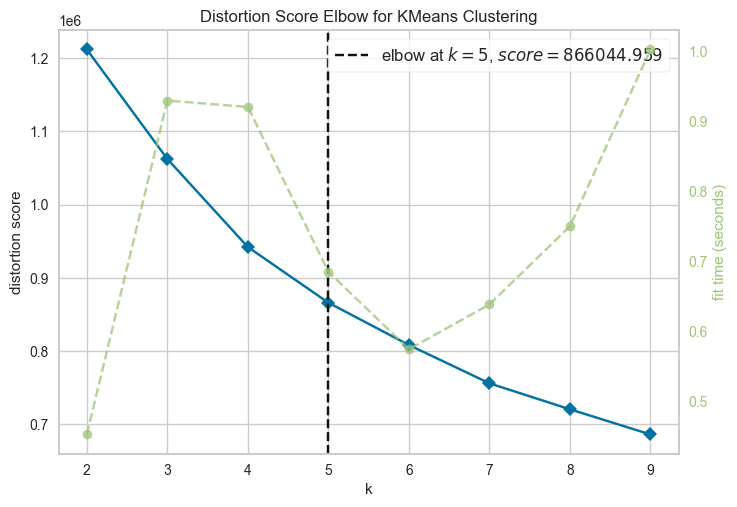

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
# Use the Elbow method to find the optimal number of clusters (k) with normalized data
model = KMeans(random_state=123)
visualizer = KElbowVisualizer(model, k=(2, 10))
visualizer.fit(X_normalized)
visualizer.show()

The graph above shows the reduction of a distortion score as the number of clusters increases. The underlying algorithm suggests 5 clusters. A choice of 5 or 6 clusters seems to be fair.

Another way to choose the best number of clusters is to plot the silhouette score in a function of number of clusters.

In [32]:
from sklearn.metrics import silhouette_score

In [34]:
silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(X_normalized)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Values of k')
plt.show()

C:\Users\ASUS\.virtualenvs\data-mining-2023-24\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyboardInterrupt: 